# TP Module 1 : Introduction au deep learning, prise en main de Tensorflow et Keras

Le but de ce tp est ici de se familiariser avec Tensorflow et son API haut niveau Keras.

In [0]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

import numpy as np
import random
import os

# freeze de l'aléatoire, pour avoir des expériences reproductibles.
RANDOM_SEED = 42

os.environ['PYTHONHASHSEED'] = str(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
tf.random.set_seed(RANDOM_SEED)

2.2.0-rc3
2.3.0-tf


In [0]:
!nvidia-smi

Tue Apr 21 07:33:53 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

**Avant de voir la création de modèles en tant que tel, discutons un peu de Tensorflow.**

## **Tenseurs et opérations**

L'objet de base dans Tensorflow est le tenseur. Si vous avez les connaissances de bases en algèbre linéaire, ça ne devrait pas être compliqué.

Un tenseur est un tableau multidimensionnel, tout comme l'équivalent Numpy avec `ndarray`.

-  Un tenseur en dimension 0 correspond à un scalaire (un nombre),
-  Un tenseur de dimension 1 correspond à un vecteur,
-  Un tenseur de dimension 2 correspond à une matrice,
-  Une fois que l'on commence à empiler des matrices ensemble dans un nouveau tableau, on obtient un tenseur en 3 dimensions, que l'on peut interpréter comme un cube de nombres.

Les opérations mathématiques possibles avec Numpy se font exactement de la même façon avec les tenseurs, et il se définissent exactement de la même manière. Il suffit principalement de remplacer `np.array` par `tf.constant`.

### **Exemple**

In [0]:
a = np.array([1, 2, 3])

print(f'{a}, {a.dtype}')

[1 2 3], int64


In [0]:
# On peut directement transformer un numpy array en tenseur tensorflow

tf_a = tf.constant(a)
tf_a

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([1, 2, 3])>

In [0]:
# On peut aussi le créer directement

b = tf.constant([1,2,3])
b

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

<font color=red>**Attention**</font>

Comme montré au dessus, le type n'est pas le même, pour `tf_a` le type est hérité de Numpy, les entiers de `tf.constant` sont au type `int32`. Comme pour Numpy on peut changer le type des tenseurs.

In [0]:
b = tf.constant([1,2,3], dtype = 'int64')
tf_a == b

<tf.Tensor: shape=(3,), dtype=bool, numpy=array([ True,  True,  True])>

### **Exercice**

Ecrire comme un tenseur la matrice $2 \times 3$ suivante :

$$  \mathbf{W} = \begin{pmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{pmatrix}$$

des 2 façons possibles :

-  Ecrire sous la forme d'un `ndarray` Numpy puis le convertir,
-  Directement via `tf.constant`

Via les commandes `shape` et `dtype`, afficher la forme et le data type de de chacun, puis faire sorte que les 2 façons coïncident.

In [0]:
a = np.array([[1,2,3],[4,5,6]])

print(f'shape = {a.shape}, data type = {a.dtype}')

shape = (2, 3), data type = int64


In [0]:
tf_a = tf.constant(a)

print(f'shape = {tf_a.shape}, data type = {tf_a.dtype}')

shape = (2, 3), data type = <dtype: 'int64'>


In [0]:
b = tf.constant([[1,2,3],[4,5,6]], dtype=tf.int64)

print(f'shape = {b.shape}, data type = {b.dtype}')

shape = (2, 3), data type = <dtype: 'int64'>


In [0]:
tf_a == b

<tf.Tensor: shape=(2, 3), dtype=bool, numpy=
array([[ True,  True,  True],
       [ True,  True,  True]])>

### **Exercice**

A l'aide de la commande `tf.reshape`, modifier `b` en un tenseur de forme $(3,2)$

- https://www.tensorflow.org/api_docs/python/tf/reshape

In [0]:
b = tf.reshape(b,(3,2))
b

<tf.Tensor: shape=(3, 2), dtype=int64, numpy=
array([[1, 2],
       [3, 4],
       [5, 6]])>

D'autres opération classique dans Numpy existe aussi dans tensorflow, comme la transposée

In [0]:
tf.transpose(b)

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[1, 3, 5],
       [2, 4, 6]])>

Le produit matriciel avec la commande `@`

In [0]:
tf.transpose(b)@b

<tf.Tensor: shape=(2, 2), dtype=int64, numpy=
array([[35, 44],
       [44, 56]])>

Une des options de la commande `tf.reshape` qui sera utile par la suite, et le fait de ne pouvoir que partiellement spécifier les dimensions. Mettre un `-1` dans un des axes permet de le spécifier par rapport aux autres dimensions.

In [0]:
b = tf.reshape(b,(1,-1))
b

<tf.Tensor: shape=(1, 6), dtype=int64, numpy=array([[1, 2, 3, 4, 5, 6]])>

In [0]:
c = np.random.random_sample((100,))
c = tf.reshape(c,(-1,25,2))
c

<tf.Tensor: shape=(2, 25, 2), dtype=float64, numpy=
array([[[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615],
        [0.60111501, 0.70807258],
        [0.02058449, 0.96990985],
        [0.83244264, 0.21233911],
        [0.18182497, 0.18340451],
        [0.30424224, 0.52475643],
        [0.43194502, 0.29122914],
        [0.61185289, 0.13949386],
        [0.29214465, 0.36636184],
        [0.45606998, 0.78517596],
        [0.19967378, 0.51423444],
        [0.59241457, 0.04645041],
        [0.60754485, 0.17052412],
        [0.06505159, 0.94888554],
        [0.96563203, 0.80839735],
        [0.30461377, 0.09767211],
        [0.68423303, 0.44015249],
        [0.12203823, 0.49517691],
        [0.03438852, 0.9093204 ],
        [0.25877998, 0.66252228],
        [0.31171108, 0.52006802],
        [0.54671028, 0.18485446]],

       [[0.96958463, 0.77513282],
        [0.93949894, 0.89482735],
        [0.59789998, 0.92187

## **Anatomie d'un réseau de neurones**

Keras est l'API de haut niveau de Tensorflow, elle facilite la contruction des réseaux de neurones en automatisant beaucoup de pratiques, comme la rétropropagation du gradient.

Entraîner un réseau de neurones dépend des paramètres suivants :

- Les couches de neurones, qui se combinent en un réseau (ou modèle),
- Les données : les observations et les cibles correspondantes,
- La fonction de perte, qui définira le gradient à calculer,
- la méthode d'optimisation, pour la descente du gradient.

L'ensemble des couches de neurones nécessaires à la constitution des réseaux se trouve dans la partie `tensorflow.keras.layers` de la librairie Tensorflow. Par exemple, appelons une couches de neurones denses avec 10 neurones dedans.

In [0]:
from tensorflow.keras.layers import Dense

layer = Dense(10)

In [0]:
from tensorflow import keras

layer = keras.layers.Dense(10)

In [0]:
layer = tf.keras.layers.Dense(10)

Toutes ces méthodes, pour appeler la couche dense sont identiques :

- dans le premier cas on a importé les couches Dense depuis `from tensorflow.keras.layers import Dense`,
- dans le deuxième cas, on a importé keras via `from tensorflow import keras`,
- dans le dernier cas, on a importé Tensorflow via `import tensorflow as tf`.

Les couches que l'on utiliserons dans ce TP seront les couches :

- `Input`
- `Dense`
- `Activation`
- `Flatten`

On importe ces couches via les commandes suivantes.

In [0]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Activation

Il existe 3 façons de construire des modèles avec Tensorflow via Keras :

- L'API Séquentielle,
- L'API Fonctionelle,
- L'API Subclassing.

## **API séquentielle**

Pour construire un modèle à partir de l'API séquentielle, on procède la façon suivante :

```python
model = models.Sequential([
InputLayer(input_shape=(dim)),
Couche_1(params),
Couche_2(params),
Couche_3(params),
...
Couche_n(params)
], name='nom_du_modèle')
```

Décrivons plus en avant les parties de ce code.

1. `model = models.Sequential([....], name='nom_du_modèle')` instancie le modèle séquentiel, c'est à l'intérieur des crochets que l'on définit la topologie du modèle.
2. `InputLayer(input_shape=(dim))` est toujours la première couche d'entrée à mettre dans le cas d'un modèle séquentiel, c'est la couche qui va prendre en entrée les données pour ensuite les faire passer dans le modèle. Il est nécessaire de préciser les dimensions des données d'entrées via le paramètres input_shape.
3. `Couche_n(params)` correspond aux différentes couches que l'on peut mettre dans l'archtecture du neurones. Pour l'instant nous travaillerons avec les deux couches suivantes :

    - Les couches de neurones denses,
    - Les couches de fonction d'activations.
    
N'hésitez pas à vous reporter à la documentation de l'API Séquentielle de Tensorlfow, notamment sur les deux couches qui nous intéressent :

- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense
- https://www.tensorflow.org/api_docs/python/tf/keras/layers/Activation
- https://www.tensorflow.org/api_docs/python/tf/keras/activations

### **Exemple : Perceptron**

In [0]:
model = models.Sequential([
    Input(shape=(10,), name='Input'),
    Dense(1),
    Activation('sigmoid')
    ], name='SeqAPI')

In [0]:
model.summary()

Model: "SeqAPI"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 11        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


Avec le code précedent, on a instancié un réseau contenant :

- 10 entrées,
- 1 neurone,
- 1 fonction d'activation sigmoïde à la fin.

**On a donc ici un modèle de Perceptron.**

la commande `model.summary()` permet d'avoir un récapitulatif de l'architecture du réseau, en particulies le nombre de paramètres du réseau, ici on en a 11.

## **API fonctionnelle**

Pour construire un modèle à partir de l'API séquentielle, on procède de la façon suivante :

```python
from tensorflow.keras import Model

inputs = Input(shape=(dim))
x = Couche_1(params)(inputs)
x = Couche_2(params)(x)
x = Couche_3(params)(x)

...

outputs = Couche_n(params)(x)
model = Model(inputs=inputs, outputs=output)
```

Ici comme le suppose le nom de l'API, chaque couche est alors considérée comme une fonction. On empile alors les couches comme l'on compose les fonctions.

`sortie = Couche(params)(entrée)` $\iff y =f(x)$

Les modèles créés via l'API séquentielle pouvant être bien plus complexes qu'un simple modèle séquentiel, avec par exemple plusieurs entrées et sorties. Pour instancier le modèle il est donc nécessaire de lui préciser quelles sont les entrées et sorties via la commande

`model = Model(inputs=inputs, outputs=output)`

Une fois que l'architecture du modèle est définie, qu'elle soit faite à partir de l'API séquentielle ou de l'API fonctionnelle ne change rien. Les méthodes pour compiler le modèle et l'entraîner sont les mêmes.

### **Exercice : Perceptron**

Réécrivez le modèle du Perceptron via l'API fonctionnelle.

In [0]:
inputs = Input(shape=(10,))
hid = Dense(1)(inputs)
out = Activation('sigmoid')(hid)

model = tf.keras.Model(inputs = inputs, outputs = out, name='FuncAPI')
model.summary()

Model: "FuncAPI"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
_________________________________________________________________
activation_7 (Activation)    (None, 1)                 0         
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


### **Exercice**

- Construire un modèle via l'API Séquentielle avec les couches suivantes :

```python
Input avec dim = (784,)
Dense(256)
Activation RELU
Dense(256)
Activation RELU
Dense(128)
Activation RELU
Dense(10)
Activation softmax
```

- Combien de paramètres ce modèles possèdent ils ?
- Refaire le même modèle avec l'API fonctionnelle.

In [0]:
model = models.Sequential([
    Input(shape=(784,)),
    Dense(256, name='dense1'),
    Activation('relu', name='relu1'),
    Dense(256, name='dense2'),
    Activation('relu', name='relu2'),
    Dense(128, name='dense3'),
    Activation('relu'),
    Dense(10, name='logits'),
    Activation('softmax', name='clf')
], name='SeqAPI')

In [0]:
model.summary()

Model: "SeqAPI"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
relu1 (Activation)           (None, 256)               0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               65792     
_________________________________________________________________
relu2 (Activation)           (None, 256)               0         
_________________________________________________________________
dense3 (Dense)               (None, 128)               32896     
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
logits (Dense)               (None, 10)                1290 

In [0]:
inputs = Input(shape=(784,), name='Input')
dns1 = Dense(256, name='dense1')(inputs)
act1 = Activation('relu', name='relu1')(dns1)
dns2 = Dense(256, name='dense2')(act1)
act2 = Activation('relu', name='relu2')(dns2)
dns3 = Dense(128, name='dense3')(act2)
act3 = Activation('relu', name='relu3')(dns3)
dns4 = Dense(10, name='logits')(act3)
clf = Activation('softmax', name='softmax')(dns4)

model = tf.keras.Model(inputs=inputs, outputs=clf, name='FuncAPI')

In [0]:
model.summary()

Model: "FuncAPI"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
dense1 (Dense)               (None, 256)               200960    
_________________________________________________________________
relu1 (Activation)           (None, 256)               0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               65792     
_________________________________________________________________
relu2 (Activation)           (None, 256)               0         
_________________________________________________________________
dense3 (Dense)               (None, 128)               32896     
_________________________________________________________________
relu3 (Activation)           (None, 128)               0   

## **Weights & Biases**

Il est possible de nommer les couches des réseaux, ainsi on peut les analyser de façon unique avec la commande `get_layer()`. Par exemple, pour observer la couche nommée 'dense1' dans le modèle, on peut faire comme suit :

In [0]:
layer = model.get_layer('dense1')
weights, biases = layer.get_weights()
print(f"Poids : {weights.shape},\n"
      f"Nombre de neurones dans la couche : {weights.shape[1]},\n"
      f"Biais : {biases.shape[0]}")

Poids : (784, 256),
Nombre de neurones dans la couche : 256,
Biais : 256


Ou alors, on peut directement les appeler via leur numero de couche et l'attribut `model.layer`, la couche 0 étant la première en haut.

In [0]:
layer = model.layers[3]
weights, biases = layer.get_weights()
print(f"Poids : {weights.shape},\n"
      f"Nombre de neurones dans la couche : {weights.shape[1]},\n"
      f"Biais : {biases.shape[0]}")

Poids : (256, 256),
Nombre de neurones dans la couche : 256,
Biais : 256


## **Compilation du modèle, Lancement de l'apprentissage : MNIST Dataset**

Le dataset MNIST des chiffres manuscrits, comporte un ensemble d'entraînement de 60 000 exemples, et un ensemble de test de 10 000 exemples. Les chiffres ont été normalisés en taille et centrés dans une image de taille fixe.

C'est une bonne base de données pour les personnes qui veulent essayer des techniques d'apprentissage sur des données du monde réel tout en dépensant un minimum d'efforts en prétraitement et en formatage.

**C'est aussi et surtout l'un des datasets les plus utilisés au monde dans la recherche académique pour faire du benchmark de modèle.**

Importons cette base de données et regardons à quoi ressemble un exemple.

In [0]:
# Importons cette librairie pour obtenir un jeu de validation
from sklearn.model_selection import train_test_split

In [0]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data()

# reshape des données pour les faire correspondre au format de tensorflow
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')

In [0]:
X_train.shape

(60000, 28, 28, 1)

In [0]:
# par défaut, train_test_split prend 25% des données pour la validation, soit ici 15000 observations.
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=42)

X_test = (X_test - 127.5) / 127.5 # Normalize the images to [-1, 1]
X_train = (X_train - 127.5) / 127.5 # Normalize the images to [-1, 1]
X_valid = (X_valid - 127.5) / 127.5 # Normalize the images to [-1, 1]

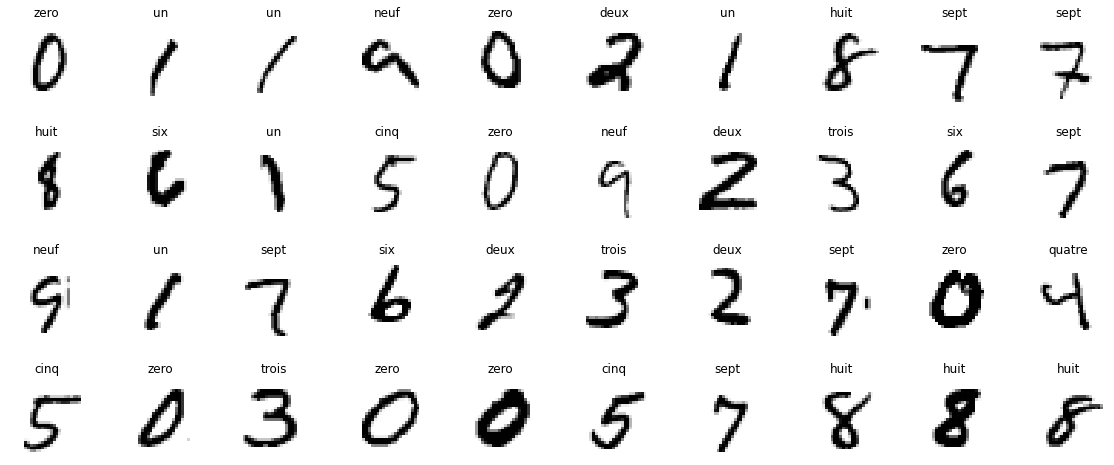

In [0]:
import matplotlib.pyplot as plt
class_names = ["zero", "un", "deux", "trois", "quatre",
               "cinq", "six", "sept", "huit", "neuf"]

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index, : , :,0], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

0


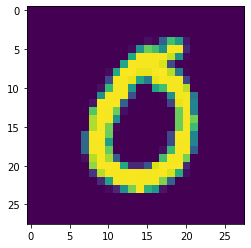

In [0]:
# Vous pouvez mettre un chiffre quelconque entre 0 et 45000 dans la première variable de X_train[valeur_variable, :, :, 0] et y_train pour afficher l'observation que vous voulez
plt.imshow(X_train[2000, :, :, 0])
print(y_train[2000])
# Ici un zéro

Le dataset comprend donc des images des chiffres de $0$ à $9$, (des tenseurs 3D) de dimension $28 \times 28$ en niveau de gris (le dernier $1$ dans la valeur de `X_train.shape`).

Le but est ici de construire un classifieur, de telle sorte qu'il soit capable de nous prédire une fois entraîné la bonne valeur du chiffre qui lui sera présenté.

Ici, on triche un peu, les réseaux dense ne sont pas spécialisés dans le traîtement des images, c'est pour cela qu'une fois l'input passée, on ajoute la couche `Flatten()` qui va se charger d'applatir l'image en un vecteur de dimension $28\times28\times1 = 784$.

C'est une couche **très importante** que nous continuerons de rencontrer très fréquemment dans la suite des modules.

In [0]:
model = models.Sequential([
    Input(shape=(28,28,1)),
    Flatten(),
    Dense(256, name='dense1'),
    Activation('relu', name='relu1'),
    Dense(256, name='dense2'),
    Activation('relu', name='relu2'),
    Dense(128, name='dense3'),
    Activation('relu'),
    Dense(10, name='logits'),
    Activation('softmax', name='clf')
], name='SeqAPI')

Pour finaliser le modèle, on a 3 hyperparamètres à lui faire passer via la commande `model.compile()`:

- La fonction de perte utilisée, qui sera utilisée pour optimiser les poids et les biais du réseau lors de la rétropropagation,
- La méthode d'optimisation utilisée pour la descente du gradient stochastique,
- Les métriques de précision qui seront utilisés pour évaluer le modèle.

**Mathématiquement**, il n'y a pas de relations entre entre la fonction de perte et les métriques de précision.

La perte peut être considérée comme une **distance entre les vraies valeurs du problème et les valeurs prédites par le modèle**. Plus la perte est importante, plus les erreurs que vous avez commises sur les données sont énormes.

La précision peut être considérée comme **le nombre d'erreurs que vous avez faites sur les données**.

Cela signifie que :

- Une faible précision et une perte énorme signifient que vous avez fait d'énormes erreurs sur un grand nombre de données
- Une faible précision mais une faible perte signifie que vous avez fait peu d'erreurs sur un grand nombre de données
- Une grande précision avec peu de pertes signifie que vous avez fait peu d'erreurs sur quelques données (dans le meilleur des cas)
- Une grande précision mais une perte énorme, signifie que vous avez fait d'énormes erreurs sur quelques données. 

In [0]:
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer=tf.keras.optimizers.SGD(lr=0.001),
             metrics=['accuracy'])

Lancer l'entraînement du modèle se fait via la commande `model.fit()`. On a alors plusieurs paramètres à rentrer :

- `X_train, y_train`, qui sont les données sur lesquelles va s'entraîner se modèle,
- `epoch` correspond au nombre d'époques pour l'entraînement du modèle. On rappelle qu'une époque correspond à un passage complet du dataset d'entraînement dans le modèle.
- `batch_size` qui correspond au nombre d'observations utilisées pour effectuer la descente du gradient, ie la taillle du minibatch
- `validation_data` Données sur lesquelles évaluer la perte et les métriques de précision du modèle à la fin de chaque époque. Le modèle ne sera pas entraîné sur ces données.

In [0]:
history = model.fit(X_train, y_train,
                   epochs = 20,
                   batch_size=64,
                   validation_data=(X_valid, y_valid))

Epoch 1/20
704/704 [==============================] - 3s 4ms/step - loss: 1.5880 - accuracy: 0.5644 - val_loss: 1.0422 - val_accuracy: 0.7642
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8051 - accuracy: 0.8077 - val_loss: 0.6613 - val_accuracy: 0.8330
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5783 - accuracy: 0.8477 - val_loss: 0.5251 - val_accuracy: 0.8578
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4848 - accuracy: 0.8684 - val_loss: 0.4648 - val_accuracy: 0.8709
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4322 - accuracy: 0.8790 - val_loss: 0.4208 - val_accuracy: 0.8789
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.3980 - accuracy: 0.8868 - val_loss: 0.3907 - val_accuracy: 0.8910
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.3732 - accuracy: 0.8919 - val_loss: 0.3725 - val_accuracy: 0.8922
Epoch 

Voyons comment s'en est sorti ce modèle.

In [0]:
import pandas as pd

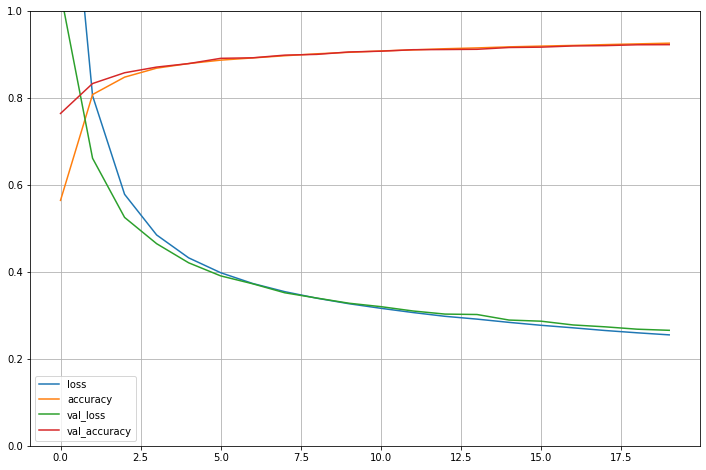

In [0]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Sur ce graphique, on observe l'évolution de la fonction de perte et la précision à la fois sur le dataset d'entraînement et sur le dataset de validation, au fil des époques. C'est un graphe utile pour juger si oui ou non notre modèle est en sur-apprentissage.

Evaluons maintenant notre modèle sur le jeu de test.

In [0]:
model.evaluate(X_test,
               y_test,
               verbose=2)

313/313 - 1s - loss: 0.2519 - accuracy: 0.9268


[0.2519499659538269, 0.926800012588501]

### **Autre méthode : One hot Encoding**

Ici `y_train` va de $0$ à $9$, or ces données ne sont pas des **données ordinales**, il n'y a pas de relations d'ordre dedans cela représente juste le nombre attendu. En les laissant comme ça, l'algorithme pourrait apprendre une représentation hiérarchique des données là où il n'y en pas.

La bonne pratique est alors de transformer ces labels, en leur appliquant une transformation dite de **"One hot encoding"** (encore une fois, le terme français est manquant). De $0$ à $9$, on a 10 chiffres, chaque nombre va donc être remplacé par sa coordonnée correspondante dans $\mathbf{R}^{10}$. Ainsi, on aura la transformation suivante.

$1 \rightarrow [0,1,0,0,0,0,0,0,0,0]$


$5 \rightarrow [0,0,0,0,0,1,0,0,0,0]$

...

In [0]:
y_train_oh = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_oh = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_valid_oh = tf.keras.utils.to_categorical(y_valid, num_classes=10)

print(y_train_oh)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


En faisant ça, il faut alors changer la fonction de perte pour la faire correspondre au format de la cible

In [0]:
model = models.Sequential([
    Input(shape=(28,28,1)),
    Flatten(),
    Dense(256, name='dense1'),
    Activation('relu', name='relu1'),
    Dense(256, name='dense2'),
    Activation('relu', name='relu2'),
    Dense(128, name='dense3'),
    Activation('relu'),
    Dense(10, name='logits'),
    Activation('softmax', name='clf')
], name='SeqAPI')

model.compile(loss = 'categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, y_train_oh,
                   epochs = 20,
                   batch_size=64,
                   validation_data=(X_valid, y_valid_oh))

Epoch 1/20
704/704 [==============================] - 3s 5ms/step - loss: 1.7050 - accuracy: 0.5485 - val_loss: 1.1580 - val_accuracy: 0.7711
Epoch 2/20
704/704 [==============================] - 3s 4ms/step - loss: 0.8620 - accuracy: 0.8126 - val_loss: 0.6781 - val_accuracy: 0.8375
Epoch 3/20
704/704 [==============================] - 3s 4ms/step - loss: 0.5857 - accuracy: 0.8542 - val_loss: 0.5239 - val_accuracy: 0.8607
Epoch 4/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4833 - accuracy: 0.8715 - val_loss: 0.4594 - val_accuracy: 0.8724
Epoch 5/20
704/704 [==============================] - 3s 4ms/step - loss: 0.4290 - accuracy: 0.8818 - val_loss: 0.4170 - val_accuracy: 0.8823
Epoch 6/20
704/704 [==============================] - 3s 4ms/step - loss: 0.3952 - accuracy: 0.8891 - val_loss: 0.3857 - val_accuracy: 0.8910
Epoch 7/20
704/704 [==============================] - 3s 4ms/step - loss: 0.3715 - accuracy: 0.8954 - val_loss: 0.3687 - val_accuracy: 0.8921
Epoch 

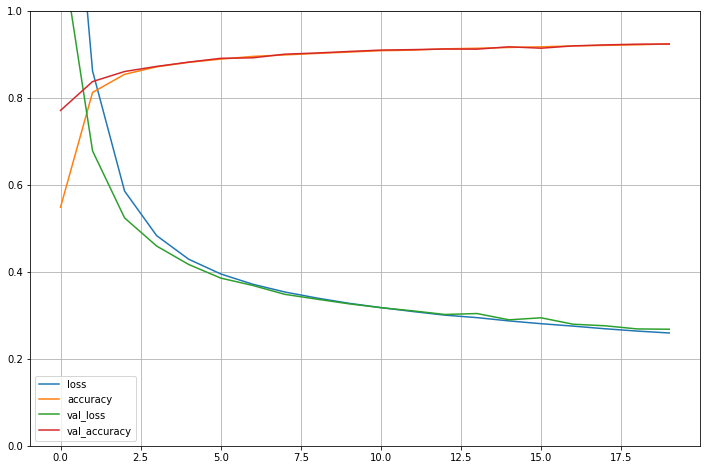

In [0]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [0]:
model.evaluate(X_test,
               y_test_oh,
               verbose=2)

313/313 - 1s - loss: 0.2435 - accuracy: 0.9289


[0.24347971379756927, 0.9289000034332275]

On arrive donc à avoir des résultats relativement bon, même avec des neurones qui ne sont pas spécialisés dans le traitement de l'image.

Mais nous sommes **loin** de l'état de l'art qui est au alentours de $99,9\%$ sur MNIST.

### **Exercice**

Prenez en main cet exemple, changez le nombre de couches, le nombres de neurones, essayez avec ou sans one hot encoding. Créer votre classifieur de nombre.

## **CIFAR-10 Dataset**

Le dataset CIFAR-10 comprend 60000 images couleur $32\times32$ réparties en $10$ classes, avec $6000$ images par classe. Il y a $50000$ images d'entraînement et $10000$ images de test.

Le dataset est divisé en un dataset d'entraînement et un dataset de test, contenant $50000$ images pour le dataset d'entraînement, le dataset de test contient exactement $1000$ images sélectionnées au hasard dans chaque classe.

In [0]:
(X_train,y_train), (X_test,y_test)  = tf.keras.datasets.cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

Les classes présentes dans le dataset sont les suivantes, chacunes représentées par un chiffre de 0 à 9. Dans l'ordre nous avons :

- airplane 
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

C'est aussi un dataset très connu pour faire du benchmark de modèle dans le milieu académique.

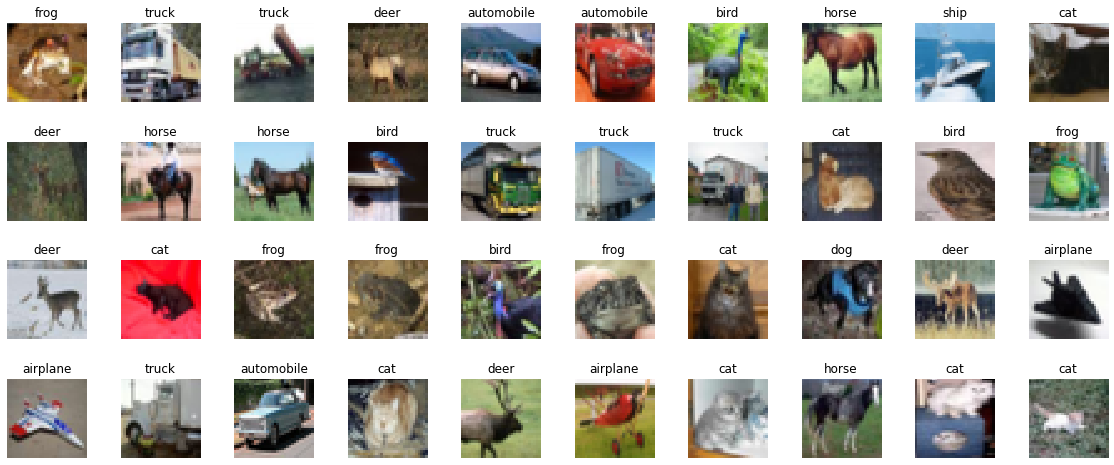

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index, : , :, :], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[:,0][index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

[6]


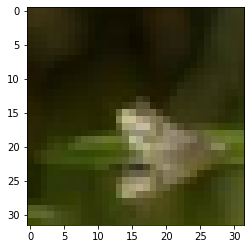

In [0]:
plt.imshow(X_train[25000, :, :, :])
print(y_train[25000])

In [0]:
X_train = X_train.reshape(-1, 32, 32, 3).astype('float32')
X_test = X_test.reshape(-1, 32, 32, 3).astype('float32')

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=RANDOM_SEED)

X_test = (X_test - 127.5) / 127.5 # Normalize the images to [-1, 1]
X_train = (X_train - 127.5) / 127.5 # Normalize the images to [-1, 1]
X_valid = (X_valid - 127.5) / 127.5 # Normalize the images to [-1, 1]

In [0]:
y_train

array([[0],
       [0],
       [9],
       ...,
       [8],
       [8],
       [8]], dtype=uint8)

### **Exercice**

Le dataset a été chargé, partagé en train, validation, test. A vous de jouer, construisez une réseau de neurones pour classifer ces images. 

- Le nombres de couches de neurones,
- Le nombres de neurones dans chaque couche,
- Si oui ou non y_train est au format one_hot,
- Le nombre d'époque,
- La taille du batch.

Tout cela dépend de vous, le squelette est là, à vous de le remplir.

In [0]:
model = models.Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    ...


    Dense(10, name='logits'),
    Activation('softmax', name='clf')
], name='SeqAPI')

model.compile(loss = ...,
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, ...,
                   epochs = ...,
                   batch_size = ...,
                   validation_data = (X_valid, ...))

In [0]:
model = models.Sequential([
    Input(shape=(32,32,3)),
    Flatten(),
    Dense(256, name='dense1'),
    Activation('relu', name='relu1'),
    Dense(256, name='dense2'),
    Activation('relu', name='relu2'),
    Dense(128, name='dense3'),
    Activation('relu'),
    Dense(10, name='logits'),
    Activation('softmax', name='clf')
], name='SeqAPI')

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=0.001),
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs = 20,
                   batch_size = 64,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
586/586 [==============================] - 3s 5ms/step - loss: 1.8880 - accuracy: 0.3349 - val_loss: 1.7019 - val_accuracy: 0.4051
Epoch 2/20
586/586 [==============================] - 3s 5ms/step - loss: 1.6359 - accuracy: 0.4247 - val_loss: 1.5955 - val_accuracy: 0.4374
Epoch 3/20
586/586 [==============================] - 3s 5ms/step - loss: 1.5345 - accuracy: 0.4609 - val_loss: 1.5408 - val_accuracy: 0.4554
Epoch 4/20
586/586 [==============================] - 3s 5ms/step - loss: 1.4591 - accuracy: 0.4914 - val_loss: 1.4981 - val_accuracy: 0.4721
Epoch 5/20
586/586 [==============================] - 3s 5ms/step - loss: 1.3968 - accuracy: 0.5146 - val_loss: 1.4699 - val_accuracy: 0.4802
Epoch 6/20
586/586 [==============================] - 3s 5ms/step - loss: 1.3426 - accuracy: 0.5315 - val_loss: 1.4369 - val_accuracy: 0.4917
Epoch 7/20
586/586 [==============================] - 3s 5ms/step - loss: 1.2934 - accuracy: 0.5515 - val_loss: 1.4188 - val_accuracy: 0.5028
Epoch 

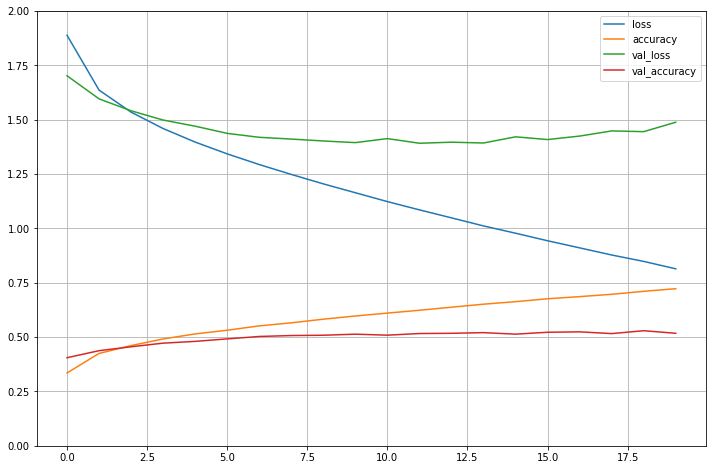

In [0]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

Ayant $10$ classes différentes, un choix au hasard donnerait une précision de l'ordre de $10\%$, le réseau fait donc mieux que choisir une classe au hasard.

Cependant on est clairement en sur-apprentissage, la fonction de perte sur le dataset d'entraînement ne fait que baisser, **ce qui est normal puisque l'on optimise les poids pour à chaque étape** mais :

- La fonction de perte sur le dataset de validation grimpe en flêche, 
- La précision sur le dataset de validation reste bloqué à $50\%$.

Pour résumer, 

Le modèle à appris par coeur les photos qu'il a pour s'entraîner, mais si on lui donne une photo au hasard du dataset de validation, il a **une chance sur deux de se tromper**.

In [0]:
model.evaluate(X_test,
               y_test,
               verbose=2)

313/313 - 1s - loss: 1.4845 - accuracy: 0.5178


[1.4845476150512695, 0.517799973487854]

## **Exemple : Overfit sur une régression linéaire**

In [0]:
model = models.Sequential([
    Input(shape=(8,)),
    Dense(10),
    Activation('relu'),
    Dense(1)
    ], name='SeqAPI')

In [0]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

In [0]:
housing = fetch_california_housing()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, random_state=RANDOM_SEED)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, random_state=RANDOM_SEED)

In [0]:
X_train.shape[1:]

(8,)

In [0]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [0]:
model.compile(loss = "mean_squared_error",
              optimizer=tf.keras.optimizers.SGD(lr=0.001))

history = model.fit(X_train, y_train,
                   epochs = 50,
                   validation_data=(X_valid, y_valid))

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 1.0085 - val_loss: 0.5576
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.7323 - val_loss: 0.5103
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.5432 - val_loss: 0.4421
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4873 - val_loss: 0.4747
Epoch 5/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4633 - val_loss: 0.5185
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4543 - val_loss: 0.5728
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4479 - val_loss: 0.6496
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.7340
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4294 - val_loss: 0.8309
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.4250 - val_loss: 1.0059

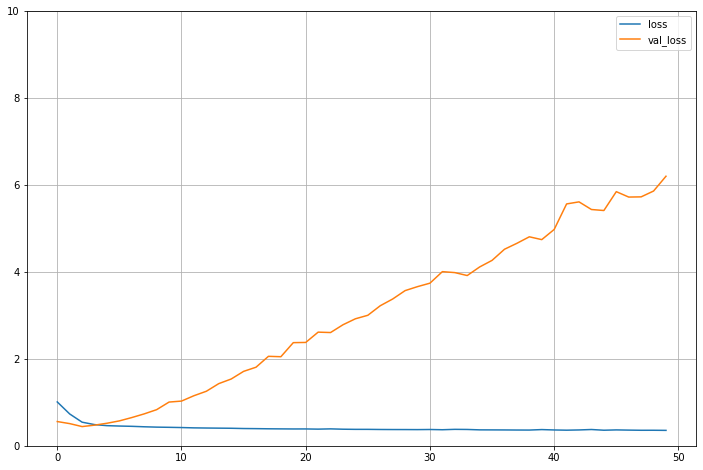

In [0]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,10)
plt.show()

## **Conclusions**

Pour résumer, la contruction d'un modèle se divise en ces étapes :

- (Collecte et mise en forme de la donnée),
- Mise en place de l'architecture : API séquentielle/fonctionelle,
- Définition du triplet [Perte, Optimiseur, Métrique],
- Définition de la commande `model.fit()`

Il semble apparent, et cela sera récurrant par la suite, que le nombre de neurones dans les couches cachées ne peut s'exprimer qu'en multiple de 32 : 32, 64, 128, 256, 512 ... **Aucun théorème mathématique ne vient soutenir cette hypothèse**.

Le fait de choisir des multiples de 32 (des puissances de 2) pour le nombres de neurones est plus une tradition et une convention informatique qu'autre chose. Si dans une moindre mesure, il est vrai que pour des neurones convolutifs (que nous verrons dans le module suivant) cela peut aider au niveau de la vitesse d'entraînement **car les algorithmes de transformée de Fourier rapide fonctionnent mieux avec un échantillonage en** $2^n$, c'est pas le cas du reste.